In [ ]:
import requests
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# size of plots in ipynb
plt.rcParams['figure.figsize'] = [10, 7]

def getDataFromApi(date_min,date_max,body):
  #create URL
  URL = "https://ssd-api.jpl.nasa.gov/cad.api?" + "date-min=" + date_min + "&date-max=" + date_max + "&body=" + body
  print("Fetch data from: " + URL)

  #send request and turn into text
  response = requests.get(URL).text

  #parse response json into dictionary
  dictionary = json.loads(response) 

  #if has values
  print("number of values: " + dictionary["count"])

  if dictionary["count"] != "0":
    #create dataset
    completeData = [dictionary["fields"]] + dictionary["data"]

    #turning dictionary into dataframe
    df = pd.DataFrame.from_dict(completeData)
    df.columns = df.iloc[0]
    df = df[1:]

    # changing values into numeric  -- TEMPORARY --
    df["orbit_id"] = pd.to_numeric(df["orbit_id"])
    df["jd"] = pd.to_numeric(df["jd"])
    df["dist"] = pd.to_numeric(df["dist"])
    df["dist_min"] = pd.to_numeric(df["dist_min"])
    df["dist_max"] = pd.to_numeric(df["dist_max"])
    df["v_rel"] = pd.to_numeric(df["v_rel"])
    df["v_inf"] = pd.to_numeric(df["v_inf"])
    df["h"] = pd.to_numeric(df["h"])
    df["cd"] = pd.to_datetime(df["cd"], format='%Y-%b-%d %H:%M')

    return df;
  return -1;



In [ ]:
# create dataframe from api
dataFrame = getDataFromApi('2010-01-01','2011-01-01','Earth')
dataFrame

Fetch data from: https://ssd-api.jpl.nasa.gov/cad.api?date-min=2010-01-01&date-max=2011-01-01&body=Earth
number of values: 353


,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
1,2010 AE3,12,2.455199e+06,2010-01-02 18:07:00,0.042010,0.041704,0.042315,13.875164,13.870592,< 00:01,23.7
2,2010 AF,9,2.455200e+06,2010-01-03 15:48:00,0.031007,0.030773,0.031241,14.508967,14.503044,00:01,25.0
3,2022 BA6,16,2.455202e+06,2010-01-05 11:19:00,0.015237,0.015223,0.016033,3.027343,2.969019,1_19:57,26.4
4,2010 AJ3,11,2.455204e+06,2010-01-07 20:52:00,0.025930,0.025870,0.025990,11.721961,11.713192,< 00:01,24.5
5,2010 AL2,10,2.455208e+06,2010-01-11 09:26:00,0.029607,0.029428,0.029787,7.281662,7.269293,< 00:01,26.7
...,...,...,...,...,...,...,...,...,...,...,...
349,2010 YS,18,2.455557e+06,2010-12-26 13:42:00,0.018550,0.018522,0.018578,12.249536,12.237805,< 00:01,22.5
350,2010 YR,10,2.455560e+06,2010-12-29 06:58:00,0.029253,0.028921,0.029584,10.246327,10.237434,< 00:01,23.9
351,2011 AD3,6,2.455560e+06,2010-12-29 12:49:00,0.024411,0.010483,0.038488,13.038531,13.030157,2_04:07,26.5
352,2011 AN37,7,2.455561e+06,2010-12-30 15:44:00,0.022876,0.022178,0.023574,6.418618,6.400447,07:05,26.1


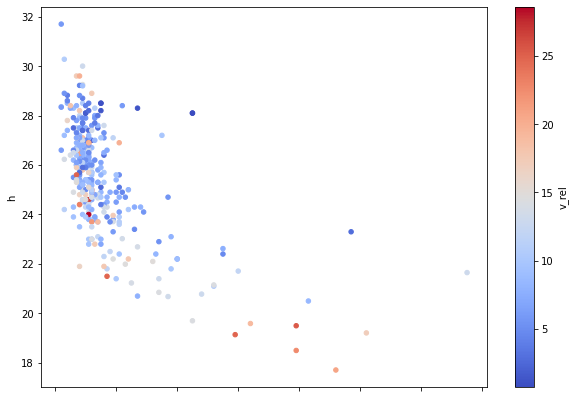

In [ ]:
# porównanie id orbity i wielkości gwiazdowej (kolor to prędkość)
dataFrame.plot.scatter(x="orbit_id", y="h", c="v_rel", cmap="coolwarm")

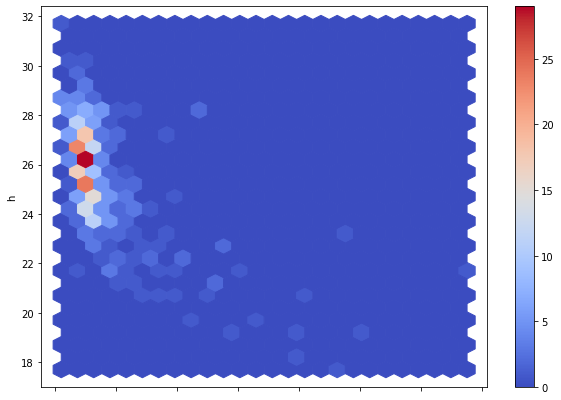

In [ ]:
# porównanie id orbity i wielkości gwiazdowej - wariant 2
dataFrame.plot.hexbin(x="orbit_id", y="h",gridsize=25, cmap="coolwarm")

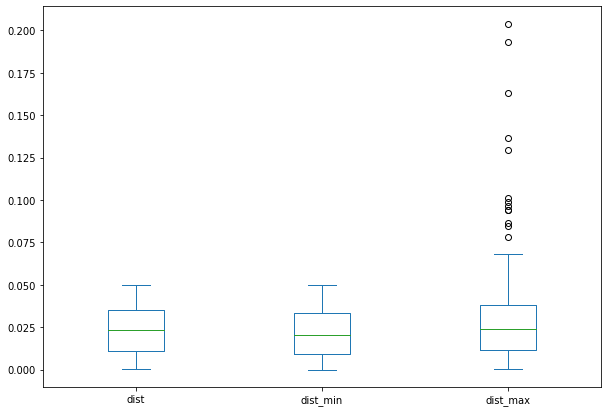

In [ ]:
def generateDistancePlot(dataFrame):
  boxPlotData = dataFrame[["dist","dist_min","dist_max"]]
  boxPlotData.plot.box()

generateDistancePlot(dataFrame);

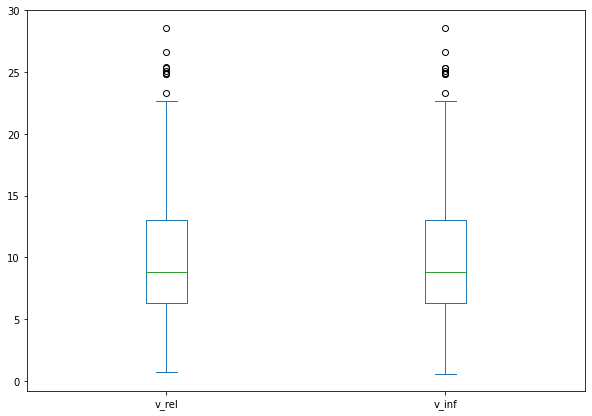

In [ ]:
def generateVelocityPlot(dataFrame):
  boxPlotData = dataFrame[["v_rel","v_inf"]]
  boxPlotData.plot.box()

generateVelocityPlot(dataFrame);

In [ ]:
def countAmmountFrame(dataFrame,size):
  dataFrame = dataFrame.set_index("cd")
  frame = dataFrame.resample(size).count()

  returnFrame = frame['des']

  df = pd.DataFrame(returnFrame)
  df = df.reset_index(level=0)
  df.index += 1
  df.columns = ['interval','ammount']

  return df

In [ ]:
intervalFrame = countAmmountFrame(dataFrame,size="7D") # interval of 7 days
intervalFrame

,interval,ammount
1,2010-01-02,4
2,2010-01-09,5
3,2010-01-16,6
4,2010-01-23,4
5,2010-01-30,5
6,2010-02-06,9
7,2010-02-13,7
8,2010-02-20,11
9,2010-02-27,3
10,2010-03-06,6


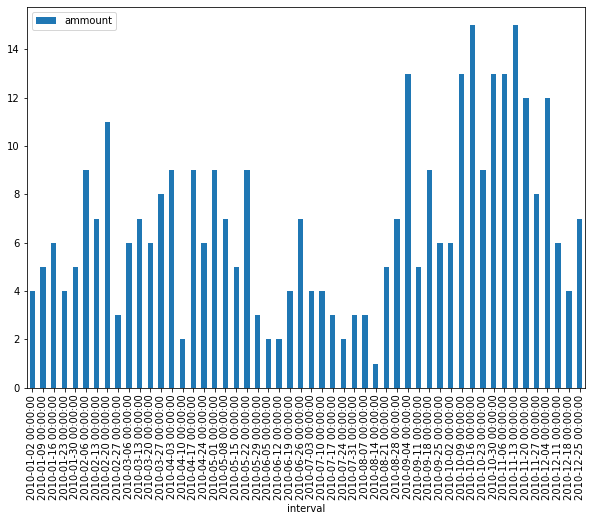

In [ ]:
intervalFrame.plot.bar(x="interval",y="ammount")

,orbit_id,h,index
1,12,23.7,2
2,9,25.0,2
3,16,26.4,2
4,11,24.5,2
5,10,26.7,2
...,...,...,...
349,18,22.5,2
350,10,23.9,2
351,6,26.5,2
352,7,26.1,2


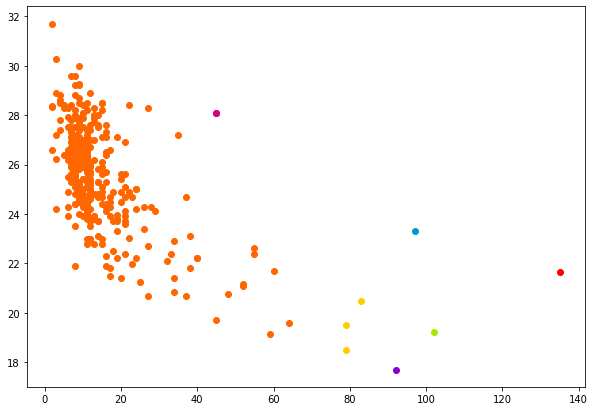

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
def hierarchyGroup(dataFrame,cls,show=False):
  array = dataFrame.to_numpy()
  z = linkage(array, method="single")
  idx = fcluster(z, cls, 'maxclust')

  if(show):
    clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
        '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']
    plt.figure()
    for i in range(1,cls+1):
        plt.plot(array[idx==i,0],array[idx==i,1], 'o', color =clr[i])

  returnFrame = dataFrame.assign(index = idx)
  return returnFrame


#hierarchyGroup(dataframe = daneDoKlasteryzacji (dataFrame), cls = ilość klastów (int), show = czy pokazać wynik (bool))
indexFrame = hierarchyGroup(dataFrame = dataFrame[["orbit_id","h"]], cls = 7,show = True)
indexFrame